# 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


・Home Creditはどのような企業？

・このコンペティションでは何を予測する？

・それを予測することで企業が得られるメリットは何？

### Home Creditはどのような企業？

ホームクレジット社は、ポジティブで安全な借入経験を提供することによって、
銀行口座を持たない人々のためのファイナンシャル・インクルージョン (貧困層に正規の金融取引ができるように改善する解決策を提供すること) を広めるために努力しています。

### このコンペティションでは何を予測する？

債務不履行リスク

### それを予測することで企業が得られるメリットは何？

・返済能力のある顧客が無事借入できること、そして顧客がより確実に返済完了できるような借入額、完済日、返済スケジュールを提供することが可能となる

・手数料

# 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


・.head()、.info()、describe()などを使う

・欠損値の有無を見る

・クラスごとのデータ数をグラフに出す


In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [325]:
# ローカルからデータ読み込み
df = pd.read_csv("application_train.csv")
print(df.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [326]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [327]:
print(df.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [328]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [329]:
# 目的変数
# kaggleより
#目的変数は"target"

print(df["TARGET"].head())

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64


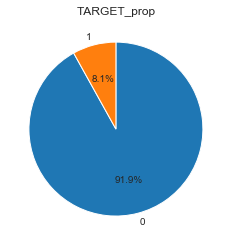

In [330]:
grouped = df.groupby('TARGET')
TARGET_prop = np.array(grouped.size())

plt.title("TARGET_prop")
label = "0", "1"
plt.pie(TARGET_prop, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.show()

# 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

①年齢によってリスクに相関があるか？

②性別の相関は？

③欠損値はどうする？

④カテゴリ変数の数値化をした方が良さそう？

⑤

# 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [331]:
# カテゴリ変数をラベルエンコーディング
# カテゴリ変数(dtype=objectの列)を抜き出す

def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

obj = _get_categorical_features(df)
print(obj)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [332]:
# カテゴリ変数を数値化
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df

_factorize_categoricals(df, obj)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,1,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,1,0,0,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,1,0,0,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,1,0,0,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [333]:
# 1.欠損値の確認
import missingno as msno
import seaborn as sns

train_null = df.isnull().sum()[df.isnull().sum()>0].sort_values()
print(train_null) # 欠損値のある列を抜き出し


DAYS_LAST_PHONE_CHANGE           1
CNT_FAM_MEMBERS                  2
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
EXT_SOURCE_2                   660
                             ...  
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
Length: 61, dtype: int64


欠損値多い。

NONLIVINGAPARTMENTS_AVGとかCOMMONAREA_MODEは半分以上欠損しているので無視してもいいかも?


In [334]:
# 2.そもそも欠損してていいの？

df['NONLIVINGAPARTMENTS_AVG']

0         0.0000
1         0.0039
2            NaN
3            NaN
4            NaN
           ...  
307506    0.0753
307507    0.0000
307508    0.0000
307509       NaN
307510       NaN
Name: NONLIVINGAPARTMENTS_AVG, Length: 307511, dtype: float64

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

DeepLの翻訳によると
「クライアントが住んでいる建物の情報を正規化したもの、平均値(_AVG接尾辞)、モード値(_MODE接尾辞)、中央値(_MEDI接尾辞)アパートの大きさ、共用部、居住面積、築年数、エレベーターの数、エントランスの数、建物の状態、階数」とのことだが、この説明はcolumn47〜93まで同一で大体どれも建物のことに関する項目。
欠損値も半分以上ないものがほとんど、後述するが相関係数もかなり低く、建物の評価自体は債務不履行リスクに関係ない可能性が高い？

In [335]:
# 3.念のため見てみる
print(train_null.tail(45))

TOTALAREA_MODE                  148431
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
FLOORSMAX_MEDI                  153020
LIVINGAREA_MEDI                 154350
LIVINGAREA_AVG                  154350
LIVINGAREA_MODE                 154350
ENTRANCES_MODE                  154828
ENTRANCES_MEDI                  154828
ENTRANCES_AVG                   154828
APARTMENTS_MODE                 156061
APARTMENTS_AVG                  156061
APARTMENTS_MEDI                 156061
ELEVATORS_MODE                  163891
ELEVATORS_AVG                   163891
ELEVATORS_MEDI                  163891
NONLIVINGAREA_AVG               169682
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_MEDI              169682
EXT_SOURCE_1                    173378
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_MODE        

欠損値多い45項目。

ほぼ建物に関する項目がランクインしている。ローンの信用情報に、現住する建物はあんまり関係なさそうだし、下記bar図を見ても明らかに建物関係は情報量が少ない。欠損の理由や原因によっては一概に削除より補完の方が良いと思うが、今回の47~93に関しては、削除の方が良さそうに感じる。(勘)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64


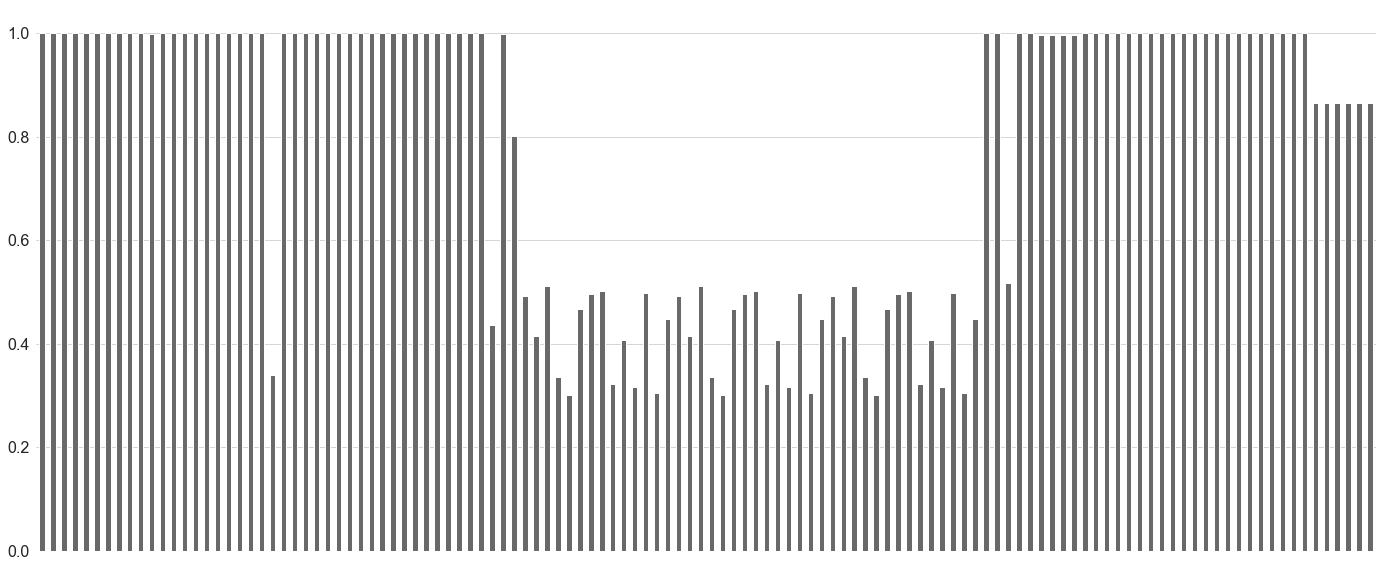

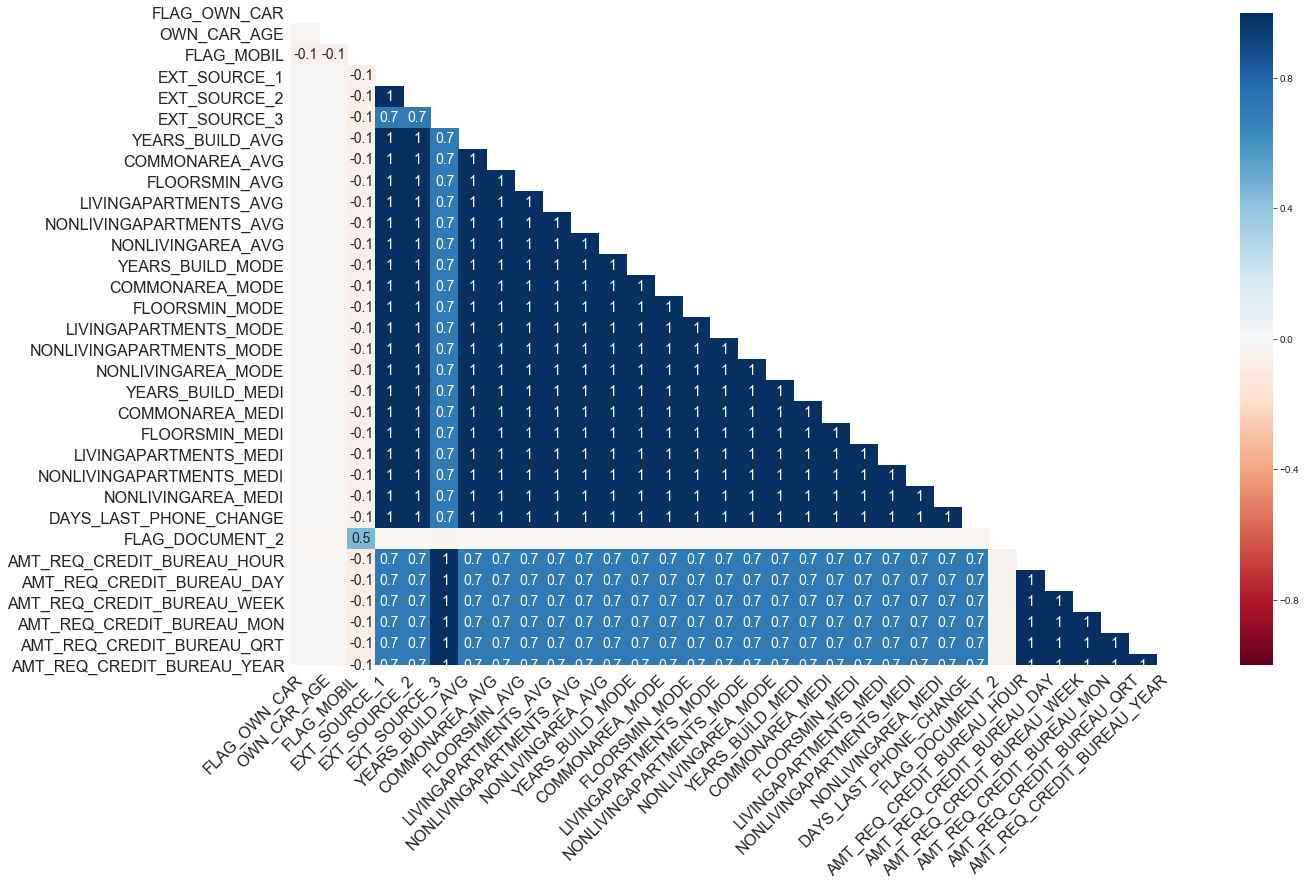

In [336]:
# 4.欠損状態と相関係数、ヒートマップ表示

msno.bar(df) # bar表示

corr = df.corr()
df_s = corr.sort_values(['TARGET'], ascending=False)
print(df_s['TARGET'].head(11))

msno.heatmap(corr) # heatmap表示

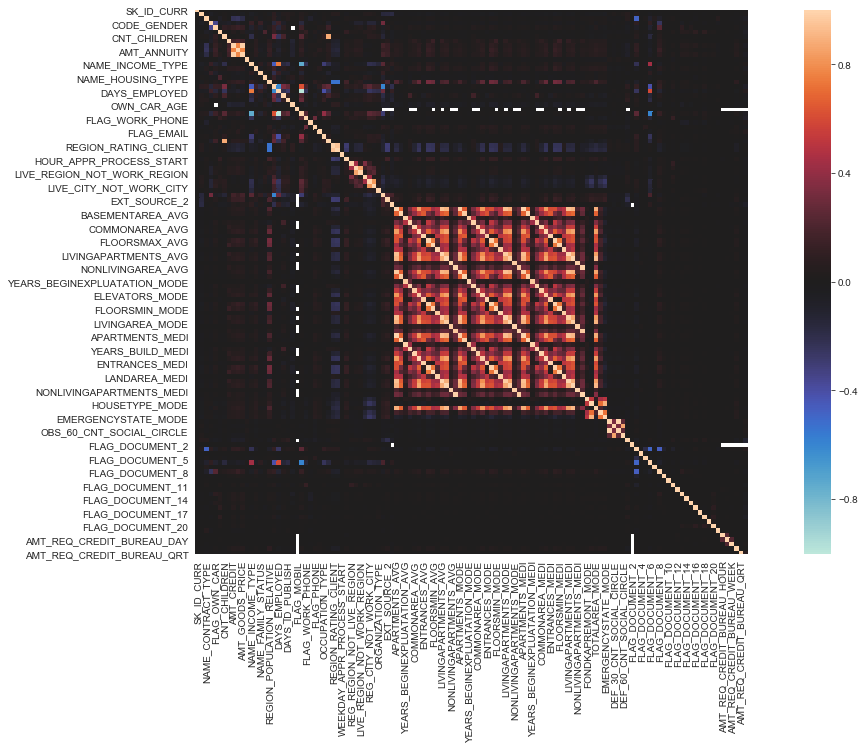

In [337]:
# 5.seebornでヒートマップ化
plt.figure(figsize=(20, 10))
sns.heatmap(corr, square=True, vmax=1, vmin=-1, center=0) 

plt.show()  

In [338]:
# 6.44〜90を削除
#print(df.columns[44:91])

del_df = df.drop(df.columns[44:91], axis=1)
print(del_df)

        SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   0            0             0   
1           100003       0                   0            1             0   
2           100004       0                   1            0             1   
3           100006       0                   0            1             0   
4           100007       0                   0            0             0   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   0            0             0   
307507      456252       0                   0            1             0   
307508      456253       0                   0            1             0   
307509      456254       1                   0            1             0   
307510      456255       0                   0            1             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0   

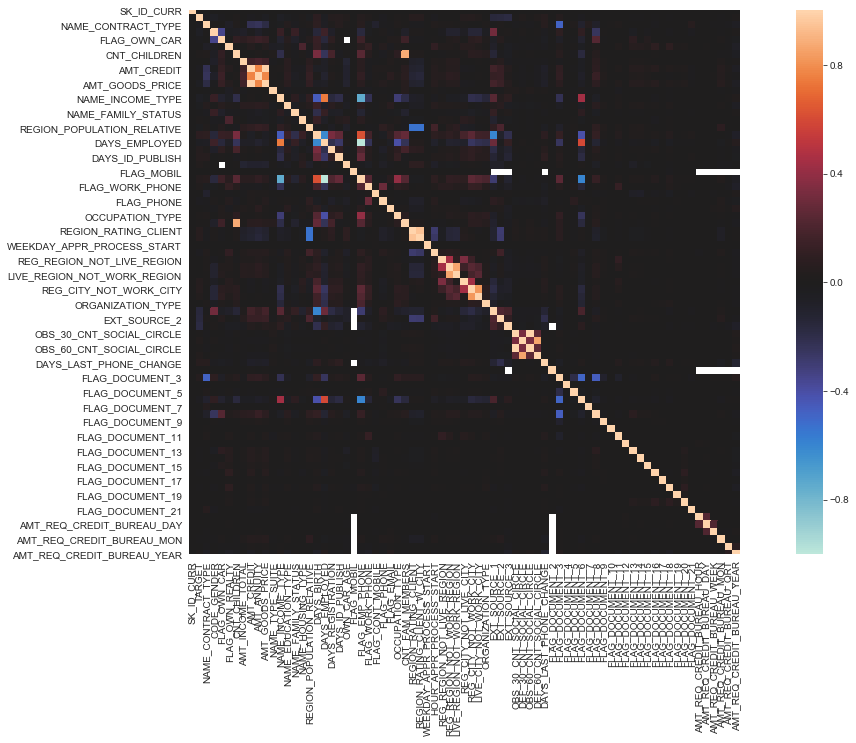

In [339]:
# 7.相関係数とヒートマップ作成

corr2 = del_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr2, square=True, vmax=1, vmin=-1, center=0) 
plt.show()  

要素が減ってちょっとスッキリ。

したけど「で？」感が強いので消した後の相関を見てみる。

In [340]:
# 8.相関係数の高い順に取り出してみる

df_s = corr2.sort_values(['TARGET'], ascending=False)
print(df_s['TARGET'].head(11))

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64


全く変動なし。

なんとなく、「説明変数が減れば相関係数も変わる」と認識していたけど、全然関係なかった。
そうなると説明変数を減らすことにはメモリ節約以上の意味はないのかもしれない。

In [341]:
# 9.他の変数の欠損率を見てみる
nan = del_df.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.float).apply(lambda col: col/col.sum(), axis=0)

nan = nan.sort_values(by=1, axis=1, ascending=False)
print(nan.iloc[1])

OWN_CAR_AGE                   0.659908
EXT_SOURCE_1                  0.563811
EXT_SOURCE_3                  0.198253
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_HOUR    0.135016
                                ...   
FLAG_PHONE                    0.000000
FLAG_CONT_MOBILE              0.000000
FLAG_WORK_PHONE               0.000000
FLAG_EMP_PHONE                0.000000
REG_CITY_NOT_LIVE_CITY        0.000000
Name: True, Length: 75, dtype: float64


最も欠損率の高いOWN_CAR_AGEは、「クライアントの車の年代」ということで年式？っぽいが、そもそも保持していない人がNaNになっていると思われる。
ここも正直無くして良いかもしれない。ただし「車を持っていない」ことが相関あるかもしれない？

また、EXT_SOURCE_1はそのまんま外部ソースなので詳細は不明っぽい。

In [342]:
# １０.FLAG_OWN_CARの相関を見てみる

In [343]:
# クラスごとにグラフ化

def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [344]:
def plot_distribution(var):
    
    i = 0
    t1 = df.loc[df['TARGET'] != 0]
    t0 = df.loc[df['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

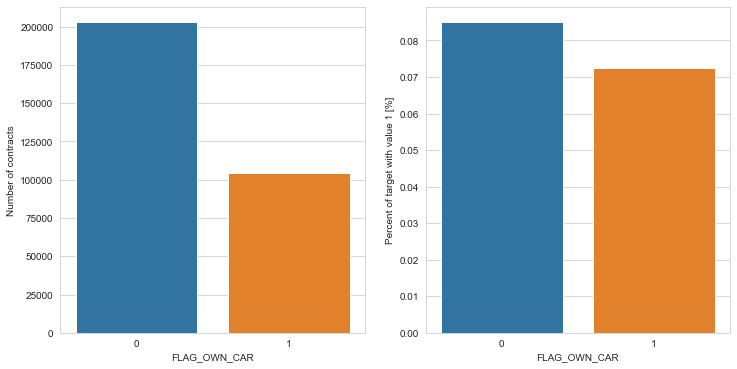

In [345]:
plot_stats('FLAG_OWN_CAR')

上の表は「車を所有しているか」と「TARGET="1"になった人のうちの割合」を示している。

所有の有無は、大体2:1であるが、1に分類された人の割合はほぼ同率となっている。
    
よって「車の所有」はリスクに関係が薄い、と推察出来る。


以上から、OWN_CAR_AGEは削除しても良いかもしれない。

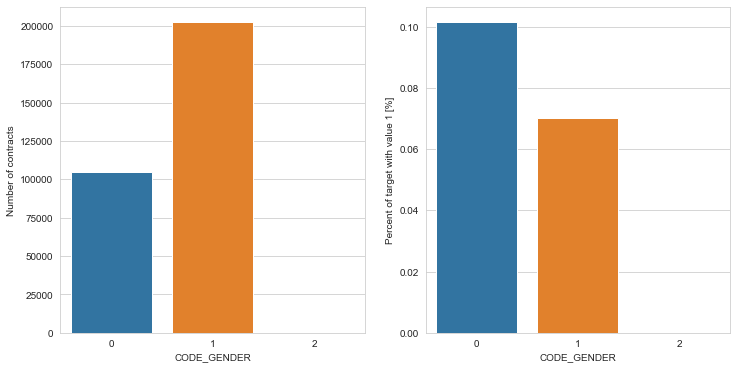

In [346]:
# 11.CODE_GENDERをグラフ化
plot_stats('CODE_GENDER')

利用客では全体的に女性(=1)の方が多い。倍近く人数いる。
しかし、高リスク判定は男性の方が多い。約1.3倍くらい。

よって、男性の方がリスクが高いことが分かる。
単純計算で 2 * 1.3 = 2.6倍リスクが高い。

以上から、女性の方がローンが通りやすいのではないか？と推論する。

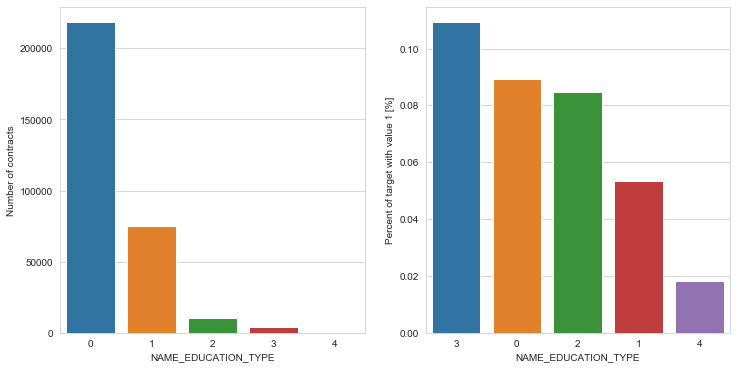

In [347]:
# 12.教育レベルとの相関

plot_stats('NAME_EDUCATION_TYPE')

多くの割合が中等教育に占められ (218k)、高等教育 (75k) がそれに続く。
TARGET==1の割合は、人数と比例せず。
学歴自体に、リスクへの高い相関があるとは言えない？

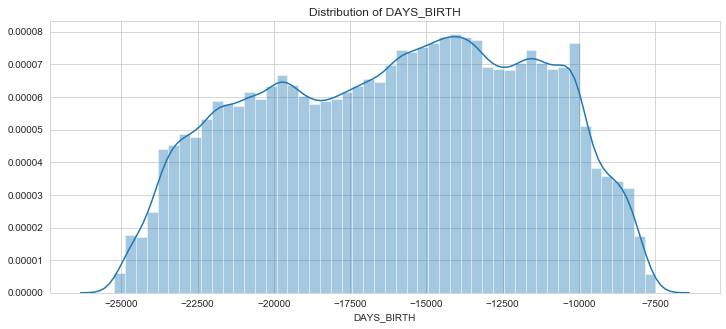

In [348]:
# 13.最も相関が高いDAYS_BIRTHをグラフ化

plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_BIRTH")
ax = sns.distplot(df["DAYS_BIRTH"])
plt.show()

項目が「借りた日から何日前に生まれたか」なのでマイナスの値。
20〜68歳までの分布。
メイン層は27〜45歳くらいまで。

In [375]:
df['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [376]:
# 14.ユーザーの年齢分布の平均、44歳を閾値に二値化

print(df['DAYS_BIRTH'] < -16037)
df.loc[df['DAYS_BIRTH'] < -16037, 'DAYS_BIRTH_binary'] = 0 # 44歳以上
df.loc[~(df['DAYS_BIRTH'] < -16037), 'DAYS_BIRTH_binary'] = 1 # 44歳以下
df['DAYS_BIRTH_binary']

0         False
1          True
2          True
3          True
4          True
          ...  
307506    False
307507     True
307508    False
307509    False
307510     True
Name: DAYS_BIRTH, Length: 307511, dtype: bool


0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    1.0
307507    0.0
307508    1.0
307509    1.0
307510    0.0
Name: DAYS_BIRTH_binary, Length: 307511, dtype: float64

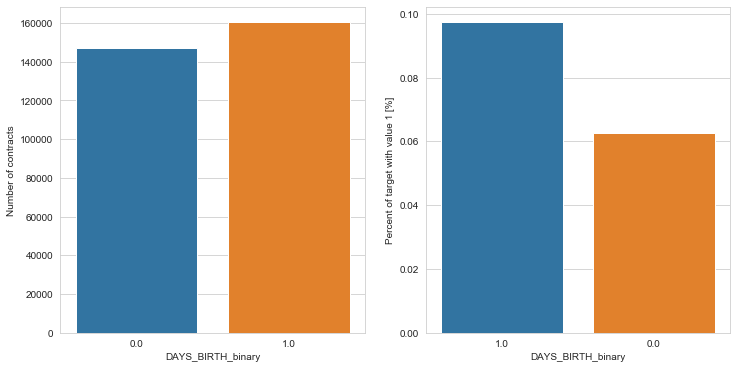

In [377]:
# 15.プロット
plot_stats('DAYS_BIRTH_binary')

人数としては44歳以下の方が多いが、リスク割合は44歳以上の方が1.5倍程度高い。
ローン開始が若い方がリスクが低い？

確かに中年以降に住宅ローン組むの難しいって聞いたことがある気がする。